## Loading Packages:

In [8]:
# essential packages
import os
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections
%matplotlib inline
print("finished")

finished


### Data Loading from google drive

In [1]:
from google.colab import drive # access the google drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Raw data preprocess


In [4]:
# Setting up the path to the data
path_var = '/content/drive/MyDrive/Colab Notebooks/Data/'
#count the total number of images
path, dirs, files = next(os.walk(path_var))
number_images = len(files)
print(number_images)

597


In [9]:
# convert real image to numpy array
images = np.ndarray(shape = (number_images, 256,256,3), dtype = np.float32) # load image in the standard format
labels = np.ndarray(shape = (number_images)) # store labels
image_names = [] # store image name

i = 0
# Loop through all files in folder, grabbing labels and images
for file in os.listdir(path_var):
  if file.split('.')[0] == 'Cofield':
    labels[i] = 0
  elif file.split('.')[0] == 'Depuy':
    labels[i] = 1
  elif file.split('.')[0] == 'Tornier':
    labels[i] = 2
  elif file.split('.')[0] == 'Zimmer':
    labels[i] = 3
  #read in the image
  pic = plt.imread(path_var + file,format='jpg') #　format rgb
  #resize the image to the standard dimension
  pic = resize(pic,(256,256,3))
  images[i] = pic # store raw image
  image_names.append(file)
  i += 1

name_map = collections.defaultdict()
name_map[0] = 'Cofield'
name_map[1] = 'Depuy'
name_map[2] = 'Tornier'
name_map[3] = 'Zimmer'



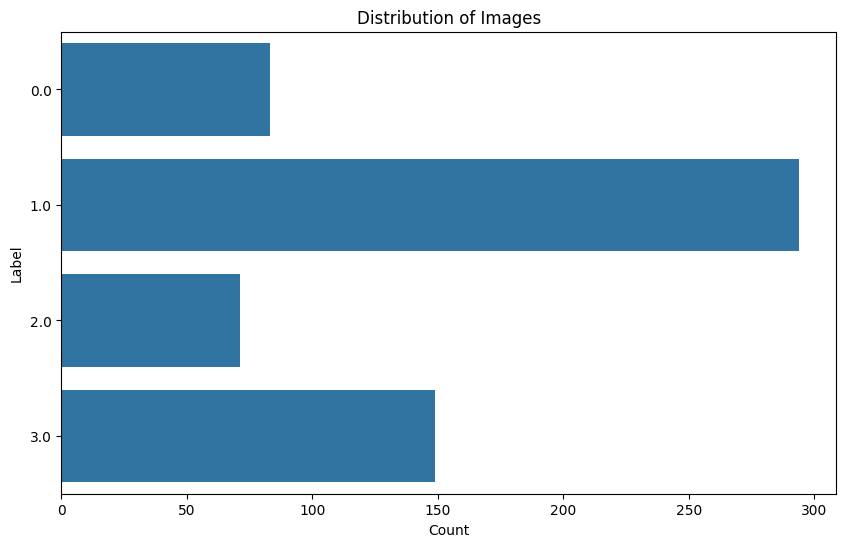

In [14]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.countplot(y=labels)
plt.xlabel('Count')
plt.ylabel('Label')
plt.title('Distribution of Images')
plt.show()

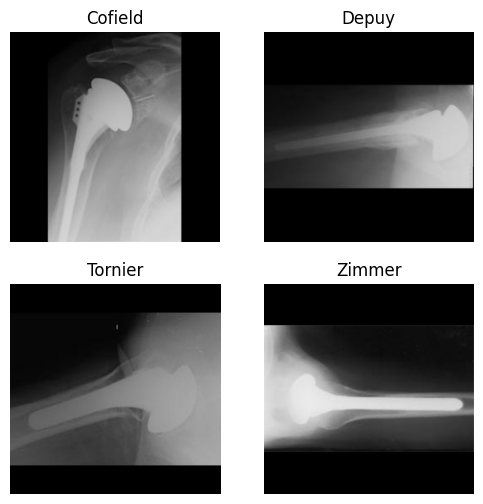

In [23]:
# Corrected mapping between indices and class labels
indx = [0, 1, 2, 3]  # Indices of the images to display
class_label = [0, 1, 2, 3]  # Corresponding class labels of the images
index_map = dict(zip(indx, class_label))

plt.figure(figsize=(6, 6))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[index_map[i]])
    plt.title(name_map[int(class_label[i])])  # Use class_label directly
    plt.axis("off")
plt.show()




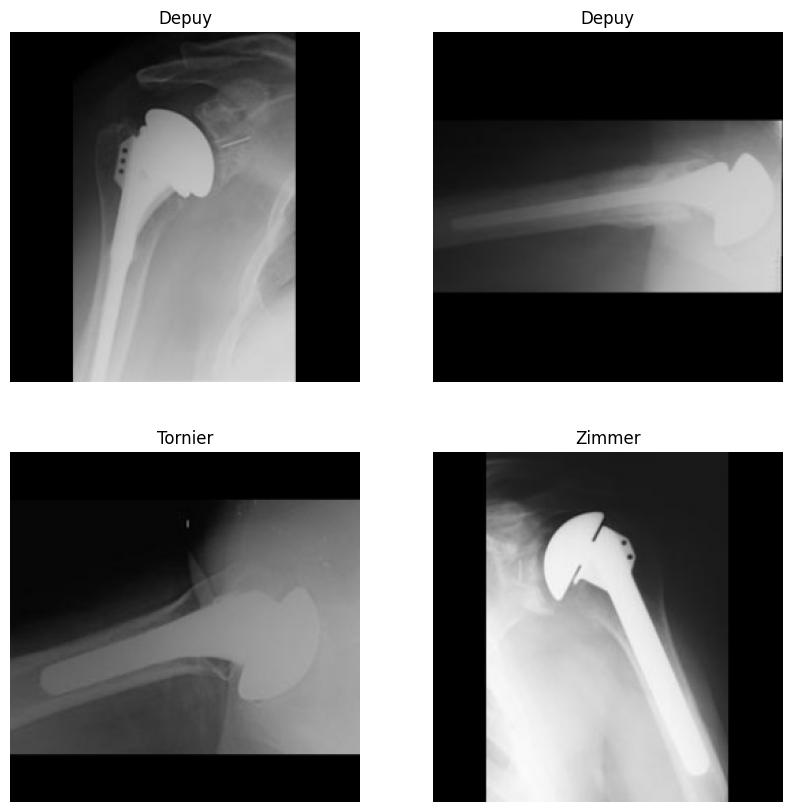

In [ ]:
indx = [0,1,2,3] # take four images from different class for visualization
class_label = [0,1,2,5]
index_map = dict(zip(indx, class_label))

plt.figure(figsize=(10, 10))
for i in range(0,4):
  ax = plt.subplot(2, 2, i%4+1)
  plt.imshow(images[index_map[i]])
  plt.title(name_map[int(labels[class_label[i]])])
  plt.axis("off")


In [ ]:
#saving the files
path_var_new = '/content/drive/MyDrive/Colab Notebooks/'
np.save(path_var_new + 'images_origin', images)
np.save(path_var_new + 'labels',labels)
np.save(path_var_new + 'image_names',np.asarray(image_names))